# AMT Test of SR Model

Implement a CRF to test model on data

In [1]:
## Imports 
%matplotlib inline

STRUCTURED = '/Users/maru/MyCode/structured'
IMDB_DATA='/Users/maru/MyCode/data/imdb'
SRAA_DATA='/Users/maru/MyCode/data/sraa'
TWIITER_DATA = '/Users/maru/MyCode/data/twitter'

# STRUCTURED = '/Users/maru/My Code/structured'
# IMDB_DATA='/Users/maru/Dataset/aclImdb'
# SRAA_DATA='/Users/maru/Dataset/aviation/data'
# TWIITER_DATA = '/Users/maru/Dataset/twitter'

import sys
import os
sys.path.append(os.path.abspath(STRUCTURED))
sys.path.append(os.path.abspath('C:/cygwin/home/mramire8/python_code/structured/'))

import learner

from utilities.datautils import load_dataset
import experiment.base as exp


import utilities.experimentutils as exputil
import utilities.datautils as datautil
import numpy as np
import nltk
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.style.use('bmh')

In [3]:
# Load data 
from utilities.amt_datautils import load_amt_imdb
amt = load_amt_imdb(IMDB_DATA, shuffle=True, rnd=1928374, amt_labels='labels')  # should bring with training labels as the amt annotations


In [20]:
## Get the data ready

vct = exputil.get_vectorizer({'vectorizer':'bow', 'limit':None, 'min_size':2})

amt.train.bow = vct.fit_transform(amt.train.alldata)
amt.test.bow = vct.transform(amt.test.data)


# GET THE EXPERT
expert_config = {
    'type'           : "amtexpert", 
    'model'          : "lrl1",
    'parameter'      : 0.3,
    'costmodel'      : 1,
    'sent_tokenizer' : "amt-sent", #windowsnippet, first1snippet",
    'snip_size'      : (1,1),
    'threshold'      : .4,
    'scale': 0.
}
amt_expert = exputil.get_expert(expert_config, size=len(amt.train.data))
amt_expert.fit(amt.train.data, y=amt.train.target, vct=vct)

# file_name        : 'amt.results.csv'
# lbl_file        : 'amt_lbl_neucoin.csv'



In [40]:
sent_k = exputil.get_tokenizer(expert_config['sent_tokenizer'],snip_size=expert_config['snip_size'])

In [5]:
print amt.train.keys()

['docid', 'target', 'DESCR', 'alltarget', 'doctarget', 'filenames', 'target_names', 'data', 'alldata']


In [37]:
print len(amt.train.data)

250


In [39]:
amt.train.data[0]

"'Smokey And The Bandit' wasn't exactly Shakespeare, but then nobody wanted it to be.THIS_IS_A_SEPARATORIt was lowdown slapstick, but it did have brains.THIS_IS_A_SEPARATORIt had a very smart script with definable characters and a fun wrap-up.THIS_IS_A_SEPARATORPeople came out of the theater smiling.THIS_IS_A_SEPARATOR'Hooper' provides none of this.THIS_IS_A_SEPARATORThere is no reason to smile.THIS_IS_A_SEPARATORIf it's supposed to be a tribute to the Hollywood Stuntman, it makes them look awfully lazy by providing nothing but badly-choreographed fight scenes and one of the most unconvincing car-jumps I've ever seen.THIS_IS_A_SEPARATORIt all looks phony, badly-filmed almost on purpose.THIS_IS_A_SEPARATORPoor Sally Field (as the girlfriend who wrings her hands on the sidelines) is given her weakest role, with not a single funny or smart line ('If you do that jump, I won't be here when you get back').THIS_IS_A_SEPARATORBurt Reynolds keeps looking at the camera and winking, but the joke 

In [116]:
## Get learning curve data
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve

def get_learning_curve(estimator, X, y, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    return train_sizes, test_scores_mean, test_scores_std

def relabel_curve(x, y, clf, rnd=123):
#     kcv = cross_validation.StratifiedKFold(y, n_folds=5, shuffle=True, random_state=rnd)
    kcv = cross_validation.LeaveOneOut(len(y))

    sizes = np.linspace(.1, 1.0, 5)#

    x, y , st = get_learning_curve(clf, x, y, cv=kcv, train_sizes=sizes)
    plt.errorbar(x, y, yerr=st, label='')

    plt.legend(loc='best')
    plt.title("Sentence Student Test - LRL1")
    plt.show()




In [117]:
rnd = np.random.RandomState(2345)
clf = exputil.get_classifier('lrl1', parameter=1)
sents = sent_k.tokenize_sents(amt.train.data)
sents_txt = []
sents_lbl = []
for s,t in zip(sents, amt.train.target):
    sents_txt.extend(s)
    sents_lbl.extend(t)
sents_bow = vct.transform(sents_txt)
sents_lbl = np.array(sents_lbl)
# 

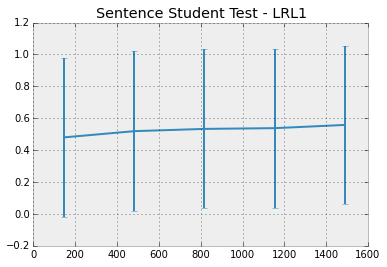

In [118]:
relabel_curve(sents_bow[sents_lbl != 2], sents_lbl[sents_lbl !=2], clf, rnd=rnd)

In [102]:
sents_bow[sents_lbl != 2].shape

(1489, 267154)

In [103]:
len(sents_lbl)

2852